In [19]:
!pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


In [ ]:
from google.colab import files
data=files.upload()

In [ ]:
df = pd.read_csv('drugs.csv.csv', sep=';')

In [ ]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [ ]:
df['SMILES','Standard Value']

KeyError: ('SMILES', 'Standard Value')

In [ ]:
import pandas as pd

# Assuming the 'drugs.csv.csv' is already loaded into df
# First, clean the DataFrame by dropping rows with missing values (NaNs)
cleaned_df = df.dropna(subset=['Smiles', 'Standard Value'])

# Select only the 'Smiles' and 'Standard Value' columns
selected_columns = ['Smiles', 'Standard Value']
filter_df = cleaned_df[selected_columns]

# Display the resulting DataFrame
print(filter_df.head())


                                              Smiles  Standard Value
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...           230.0
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1         50000.0
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...         50000.0
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...            35.0
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...            13.0


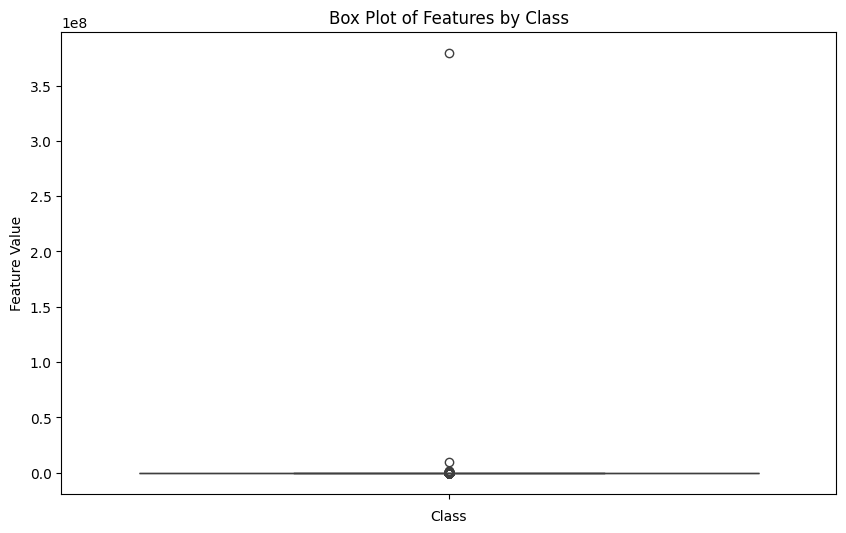

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Standard Value', data=filter_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()
#black circles signify outliers


In [ ]:
import numpy as np
import pandas as pd

# Sample data
data = {
    'Smiles': ['CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...',
               'O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1',
               'C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...',
               'Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...',
               'COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...'],
    'Standard Value': [230.0, 50000.0, 50000.0, 35.0, 13.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert Standard Value (IC50) to pIC50
df['pIC50'] = -np.log10((df['Standard Value'])/(10**9))

# Display the DataFrame with pIC50
print(df)


                                              Smiles  Standard Value     pIC50
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...           230.0  6.638272
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1         50000.0  4.301030
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...         50000.0  4.301030
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...            35.0  7.455932
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...            13.0  7.886057


In [ ]:
# Drop the 'Standard Value' column
df = df.drop('Standard Value', axis=1)

# Display the DataFrame after dropping the column
print(df)


                                              Smiles     pIC50
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...  6.638272
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1  4.301030
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...  4.301030
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...  7.455932
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...  7.886057


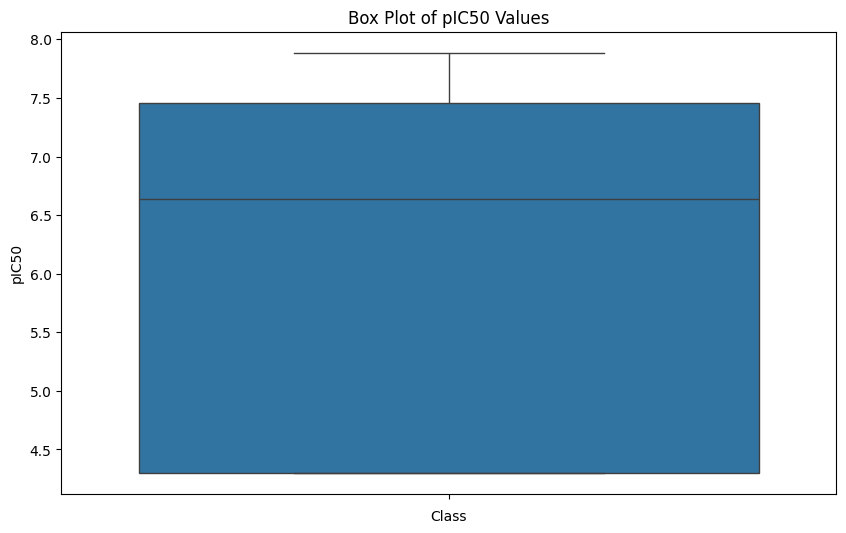

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for pIC50 values
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(y=df['pIC50'])   # Create the box plot

# Add title and labels
plt.title('Box Plot of pIC50 Values')
plt.xlabel('Class')
plt.ylabel('pIC50')

# Show the plot
plt.show()


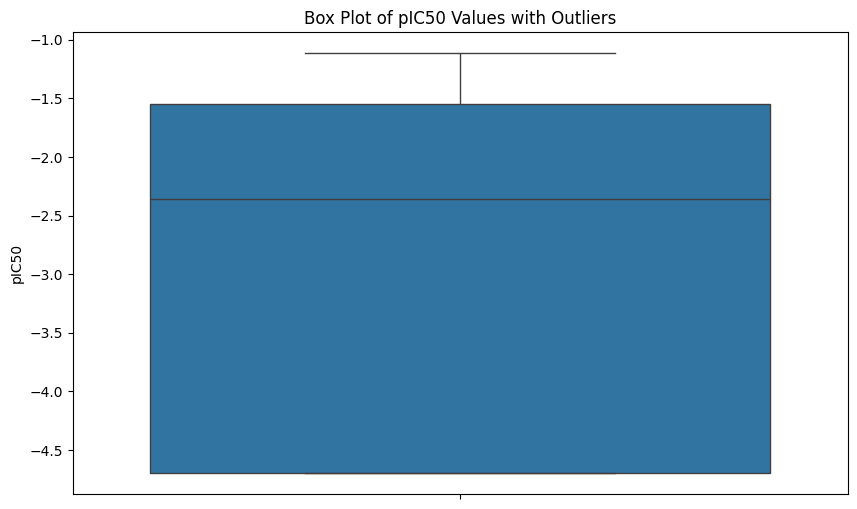

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for pIC50 values with larger outlier markers
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(y=df['pIC50'], fliersize=8)  # Increase the fliersize for outliers

# Add title and labels
plt.title('Box Plot of pIC50 Values with Outliers')
plt.ylabel('pIC50')

# Show the plot
plt.show()


In [ ]:
min_value = df['pIC50'].min()
max_value = df['pIC50'].max()
print(f"Minimum pIC50: {min_value}")
print(f"Maximum pIC50: {max_value}")


Minimum pIC50: 4.301029995663981
Maximum pIC50: 7.886056647693163


In [ ]:

# Check the actual column name from the DataFrame
print(filter_df.columns)

# Assuming 'pIC50' is the correct name
thresholds= []
for i in filter_df['pIC50']:
    if float(i) >=7 :
        thresholds.append("Rank I")
    elif float(i) >= 5 and float(i) <7:
        thresholds.append("Rank II")
    elif float(i) > 5:
        thresholds.append("Rank III")
    else:
        thresholds.append("Out of Range")  # Optional: label for values not in specified ranges

# Add the thresholds list as a new column in the DataFrame
filter_df['threshold'] = thresholds

# Display the updated DataFrame
print(filter_df.head())





NameError: name 'filter_df' is not defined

In [ ]:
#checking the number of compounds in each class
#you can replace rank 1 by rank 2 and 3 to check the number of compunds in those classes

count_r1=0
for ele in filter_df['Standard_Value'threshold:
  if ele=="Rank III":
    count_r1+=1

print(count_r1)

NameError: name 'Standard_Value_threshold' is not defined

In [ ]:
#checking the number of compounds in each class
#you can replace rank 1 by rank 2 and 3 to check the number of compunds in those classes

count_r1=0
for ele in filter_df['threshold']: # Use the 'threshold' column from filter_df
  if ele=="Rank III":
    count_r1+=1

print(count_r1)

0


In [ ]:
rank = pd.Series('threshold', name='rank')
final_df = pd.concat([filter_df, rank], axis=1)
final_df.head()

NameError: name 'pd' is not defined

In [ ]:
# Ensure 'Standard Value' is a numeric type (in case it is not)
filter_df['Standard Value'] = pd.to_numeric(filter_df['Standard Value'], errors='coerce')

# Calculate pIC50 from Standard Value (assuming Standard Value is in molar concentration)
filter_df['pIC50'] = -np.log10(filter_df['Standard Value']/(10**9))


NameError: name 'pd' is not defined

In [ ]:
thresholds = []
for i in filter_df['pIC50']:
    if float(i) >= 7:
        thresholds.append("Rank I")
    elif float(i) >= 5 and float(i) < 7:
        thresholds.append("Rank II")
    elif float(i) > 5:
        thresholds.append("Rank III")
    else:
        thresholds.append("Out of Range")  # Optional: label for values not in specified ranges

# Add the thresholds list as a new column in the DataFrame
filter_df['threshold'] = thresholds


NameError: name 'filter_df' is not defined

In [ ]:
print(filter_df.head())


NameError: name 'filter_df' is not defined

In [17]:
import pandas as pd
import numpy as np

# Assuming filter_df is already defined
# Calculate pIC50 from Standard Value
filter_df['Standard Value'] = pd.to_numeric(filter_df['Standard Value'], errors='coerce')
filter_df['pIC50'] = -np.log10(filter_df['Standard Value'])

# Define the thresholds
thresholds = []
for i in filter_df['pIC50']:
    if float(i) >= 7:
        thresholds.append("Rank I")
    elif float(i) >= 5 and float(i) < 7:
        thresholds.append("Rank II")
    elif float(i) > 5:
        thresholds.append("Rank III")
    else:
        thresholds.append("Out of Range")  # Optional

# Add the thresholds list as a new column in the DataFrame
filter_df['threshold'] = thresholds

# Display the updated DataFrame
print(filter_df.head())


NameError: name 'filter_df' is not defined

In [18]:
import pandas as pd
import numpy as np

# Load your data (example with CSV)
df = pd.read_csv('drug.csv.csv', sep=';')

# Select relevant columns and clean data
selected_columns = ['Smiles', 'Standard Value']
filter_df = df[selected_columns].dropna()

# Ensure 'Standard Value' is in nanomolar (nM) by dividing by 10^9
filter_df['Standard Value'] = pd.to_numeric(filter_df['Standard Value'] / (10**9), errors='coerce')

# Calculate pIC50
filter_df['pIC50'] = -np.log10(filter_df['Standard Value'])

# Define the thresholds
thresholds = []
for i in filter_df['pIC50']:
    if float(i) >= 7:
        thresholds.append("Rank I")
    elif float(i) >= 5 and float(i) < 7:
        thresholds.append("Rank II")
    elif float(i) > 5:
        thresholds.append("Rank III")
    else:
        thresholds.append("Out of Range")

# Add the thresholds list as a new column
filter_df['threshold'] = thresholds

# Display the updated DataFrame
print(filter_df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'